In [0]:
import nltk
nltk.download('wordnet')

#from google.colab import files
#uploaded = files.upload()

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [0]:
import pandas as pd
import gensim
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from sklearn import model_selection, preprocessing, linear_model, naive_bayes, metrics, svm
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, confusion_matrix,precision_score, recall_score, roc_auc_score,roc_curve, auc, f1_score
import seaborn as sns
import sklearn

In [0]:
df = pd.read_excel("TwitterTimeline_tweets.xlsx", sheet_name=None, ignore_index=True, sort=True)
data = pd.concat(df.values(), ignore_index=True, sort=False)

In [0]:
data.isna().sum()

Unnamed: 0    0
Tweet_text    0
Tag           0
dtype: int64

In [0]:
data['Tag'].value_counts()

PT    5310
WB    2504
ST    2096
RE    1378
SI    1329
ED    1299
SP    1262
EN     866
HT     704
BN     595
GM     590
Name: Tag, dtype: int64

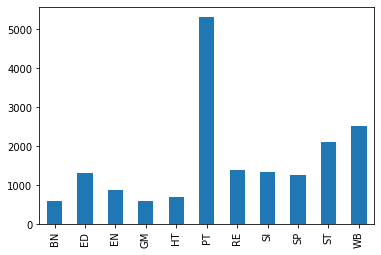

In [0]:
data['Tag'].value_counts().sort_index().plot.bar()

In [0]:
data['Tag'].describe()

count     17933
unique       11
top          PT
freq       5310
Name: Tag, dtype: object

In [0]:
data.head()

Unnamed: 0                                         Tweet_text Tag
0           0  RT @AndrewYNg: Right now economists are debati...  BN
1           1  An investment in knowledge pays the best inter...  WB
2           2  RT @IMustajabgohar: Sino Tires to Invest $600 ...  BN
3           3  RT @IKLover1992: 22 Years struggle has finally...  PT
4           4  RT @insaafian92107: Trade deficit dips 14pc to...  BN

In [0]:
data.shape

(17933, 3)

In [0]:
my_tags = ['ST', 'PT', 'HT', 'BN', 'ED', 'SP', 'EN', 'SI', 'RE', 'GM','WB']

In [0]:
stemmer = SnowballStemmer('english')
def lemmatize_stemming(text_to_preprocess):
    return stemmer.stem(WordNetLemmatizer().lemmatize(text_to_preprocess, pos='v'))

def preprocess(text_to_preprocess):
    result = []
    for token in gensim.utils.simple_preprocess(text_to_preprocess):
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3:
            result.append(lemmatize_stemming(token))
    return " ".join(result)

In [0]:
data['Tweet_text'] = data['Tweet_text'].map(preprocess)


In [0]:
train_x, test_x, train_y, test_y = model_selection.train_test_split(data['Tweet_text'], data['Tag'], stratify=data['Tag'],random_state = 0)

In [0]:
print("train_x shape",train_x.shape)
print("train_y shape",train_y.shape)
print("test_x shape",test_x.shape)
print("test_y shape",test_y.shape)

train_x shape (13449,)
train_y shape (13449,)
test_x shape (4484,)
test_y shape (4484,)


In [0]:
col=['Tag']
train_y = pd.DataFrame(train_y)
train_y['Tag'].value_counts()

PT    3982
WB    1878
ST    1572
RE    1033
SI     997
ED     974
SP     946
EN     650
HT     528
BN     446
GM     443
Name: Tag, dtype: int64

In [0]:
col=['Tag']
test_y = pd.DataFrame(test_y)
test_y['Tag'].value_counts()

PT    1328
WB     626
ST     524
RE     345
SI     332
ED     325
SP     316
EN     216
HT     176
BN     149
GM     147
Name: Tag, dtype: int64

In [0]:
encoder = preprocessing.LabelEncoder()
train_y = encoder.fit_transform(train_y.values)
test_y = encoder.fit_transform(test_y.values)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [0]:
# create a count vectorizer object 
count_vect = CountVectorizer(analyzer='word', token_pattern=r'\w{1,}')
count_vect.fit(data['Tweet_text'])

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='\\w{1,}', tokenizer=None,
                vocabulary=None)

In [0]:
# transform the training and validation data using count vectorizer object
xtrain_count =  count_vect.transform(train_x)
xtest_count =  count_vect.transform(test_x)

In [0]:
def train_model(clf, x_train, y_train, x_test, y_test, verbose=False):
    clf = clf.fit(x_train, y_train)    
    pred = clf.predict(x_test)    
    
    if verbose:
        tweet = "Virat score a double centruy in test match"
        print("Predicting tweet: {}".format(tweet))
        custom_pred = clf.predict(count_vect.transform([tweet]))
        print("Result: {}".format(encoder.inverse_transform(custom_pred)))
    
    return metrics.accuracy_score(pred, y_test)

In [0]:
def formatAccuracy(acc):
    return round(acc*100, 3)

~ Using Naive Bayes ~ 
Predicting tweet: Virat score a double centruy in test match
Result: ['SP']
Accuracy: 71.543%
roc_auc_score : 0.8259063848583929
Train acc : 0.8809576920217117
              precision    recall  f1-score   support

          ST       0.46      0.58      0.51       149
          PT       0.56      0.52      0.54       325
          HT       0.65      0.67      0.66       216
          BN       0.47      0.61      0.53       147
          ED       0.74      0.79      0.76       176
          SP       0.88      0.82      0.85      1328
          EN       0.77      0.83      0.80       345
          SI       0.44      0.40      0.42       332
          RE       0.86      0.88      0.87       316
          GM       0.77      0.77      0.77       524
          WB       0.61      0.62      0.61       626

    accuracy                           0.72      4484
   macro avg       0.66      0.68      0.67      4484
weighted avg       0.72      0.72      0.72      4484



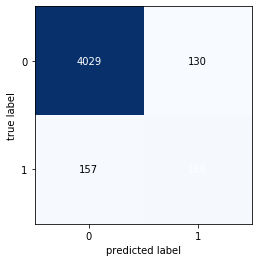

In [0]:
print ("~ Using Naive Bayes ~ ")
NBModel = naive_bayes.MultinomialNB(alpha=0.1)
accuracyNB = train_model(NBModel, xtrain_count, train_y, xtest_count, test_y, verbose=True)
print ("Accuracy: {}%".format(formatAccuracy(accuracyNB)))
NBModel = NBModel.fit(xtrain_count, train_y) 
pred = NBModel.predict(xtest_count)
from sklearn.metrics import roc_curve
def multiclass_roc_auc_score(y_test, y_pred, average="macro"):
    lb = sklearn.preprocessing.LabelBinarizer()
    lb.fit(y_test)
    y_test = lb.transform(y_test)
    y_pred = lb.transform(y_pred)
    return roc_auc_score(y_test, y_pred, average=average)


print("roc_auc_score :",multiclass_roc_auc_score(test_y,pred))
train_acc= accuracy_score(train_y, NBModel.predict(xtrain_count))
print("Train acc :",train_acc)
print(classification_report(test_y, pred,target_names=my_tags))

import matplotlib.pyplot as plt
from mlxtend.evaluate import confusion_matrix
cm = confusion_matrix(y_target=test_y, 
                      y_predicted=pred, 
                      binary=True, 
                      positive_label=1)
from mlxtend.plotting import plot_confusion_matrix

fig, ax = plot_confusion_matrix(conf_mat=cm)
plt.show()



In [0]:
#SVC
print()
print ("~ Using Linear SVC ~ ")
SVCModel = svm.LinearSVC(C=0.1)
accuracySVC = train_model(SVCModel, xtrain_count, train_y, xtest_count, test_y, verbose=True)
print ("Accuracy: {}%".format(formatAccuracy(accuracySVC)))
SVCModel = SVCModel.fit(xtrain_count, train_y) 
pred = SVCModel.predict(xtest_count)
from sklearn.metrics import roc_curve
def multiclass_roc_auc_score(y_test, y_pred, average="macro"):
    lb = sklearn.preprocessing.LabelBinarizer()
    lb.fit(y_test)
    y_test = lb.transform(y_test)
    y_pred = lb.transform(y_pred)
    return roc_auc_score(y_test, y_pred, average=average)
print("roc_auc_score :",multiclass_roc_auc_score(test_y,pred))
train_acc= accuracy_score(train_y, SVCModel.predict(xtrain_count))
print("Train acc :",train_acc)
print(classification_report(test_y, pred,target_names=my_tags))


~ Using Linear SVC ~ 
Predicting tweet: Virat score a double centruy in test match
Result: ['SP']
Accuracy: 73.372%
roc_auc_score : 0.8228697920068252
Train acc : 0.911145810097405
              precision    recall  f1-score   support

          ST       0.63      0.52      0.57       149
          PT       0.59      0.53      0.56       325
          HT       0.77      0.66      0.71       216
          BN       0.65      0.54      0.59       147
          ED       0.90      0.80      0.85       176
          SP       0.82      0.88      0.85      1328
          EN       0.83      0.83      0.83       345
          SI       0.53      0.29      0.38       332
          RE       0.87      0.87      0.87       316
          GM       0.74      0.81      0.77       524
          WB       0.55      0.68      0.61       626

    accuracy                           0.73      4484
   macro avg       0.72      0.67      0.69      4484
weighted avg       0.73      0.73      0.73      4484



SVC


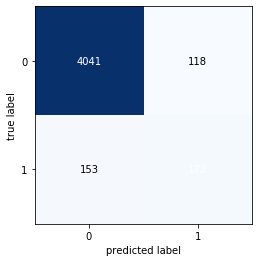

In [0]:
print('SVC')

cm = confusion_matrix(y_target=test_y, 
                      y_predicted=pred, 
                      binary=True, 
                      positive_label=1)


fig, ax = plot_confusion_matrix(conf_mat=cm)
plt.show()



In [0]:
#Lr
print()
print ("~ Using Logistic Regression ~ ")
LRModel = linear_model.LogisticRegression(C=1.0, solver='lbfgs', multi_class='multinomial')
accuracySVC = train_model(LRModel, xtrain_count, train_y, xtest_count, test_y, verbose=True)
print ("Accuracy: {}%".format(formatAccuracy(accuracySVC)))
LRModel = LRModel.fit(xtrain_count, train_y) 
pred = LRModel.predict(xtest_count)
print('Training acc : ', accuracy_score(train_y,LRModel.predict(xtrain_count)))

from sklearn.metrics import roc_curve
def multiclass_roc_auc_score(y_test, y_pred, average="macro"):
    lb = sklearn.preprocessing.LabelBinarizer()
    lb.fit(y_test)
    y_test = lb.transform(y_test)
    y_pred = lb.transform(y_pred)
    return roc_auc_score(y_test, y_pred, average=average)


train_acc= accuracy_score(train_y, LRModel.predict(xtrain_count))
print("Train acc :",train_acc)
print("roc_auc_score :",multiclass_roc_auc_score(test_y,pred))
print(classification_report(test_y, pred,target_names=my_tags))


~ Using Logistic Regression ~ 


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


Predicting tweet: Virat score a double centruy in test match
Result: ['SP']
Accuracy: 72.391%
Training acc :  0.9189530820135327
Train acc : 0.9189530820135327
roc_auc_score : 0.8146586134801287
              precision    recall  f1-score   support

          ST       0.61      0.50      0.55       149
          PT       0.57      0.51      0.54       325
          HT       0.75      0.63      0.69       216
          BN       0.66      0.52      0.59       147
          ED       0.93      0.77      0.84       176
          SP       0.81      0.87      0.84      1328
          EN       0.85      0.78      0.81       345
          SI       0.49      0.30      0.37       332
          RE       0.89      0.85      0.87       316
          GM       0.74      0.80      0.77       524
          WB       0.54      0.70      0.61       626

    accuracy                           0.72      4484
   macro avg       0.71      0.66      0.68      4484
weighted avg       0.72      0.72      0.72    

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


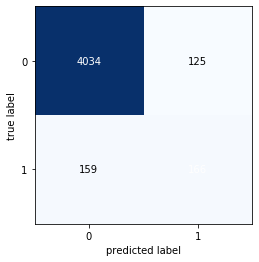

In [0]:
import matplotlib.pyplot as plt
from mlxtend.evaluate import confusion_matrix
cm = confusion_matrix(y_target=test_y, 
                      y_predicted=pred, 
                      binary=True, 
                      positive_label=1)
from mlxtend.plotting import plot_confusion_matrix

fig, ax = plot_confusion_matrix(conf_mat=cm)
plt.show()



In [0]:
#RF
print()
print ("~ Using Random Forest Classifier ~")
RFModel = RandomForestClassifier(n_estimators=500, max_depth=200, random_state=0)
accuracyRF = train_model(RFModel,xtrain_count, train_y, xtest_count, test_y, verbose=True)
print ("Accuracy: {}%".format(formatAccuracy(accuracyRF)))
RFModel = RFModel.fit(xtrain_count, train_y) 
pred = RFModel.predict(xtest_count)
from sklearn.metrics import roc_curve
def multiclass_roc_auc_score(y_test, y_pred, average="macro"):
    lb = sklearn.preprocessing.LabelBinarizer()
    lb.fit(y_test)
    y_test = lb.transform(y_test)
    y_pred = lb.transform(y_pred)
    return roc_auc_score(y_test, y_pred, average=average)

train_acc= accuracy_score(train_y, RFModel.predict(xtrain_count))
print("Train acc :",train_acc)
print("roc_auc_score :",multiclass_roc_auc_score(test_y,pred))
print(classification_report(test_y, pred,target_names=my_tags))


~ Using Random Forest Classifier ~
Predicting tweet: Virat score a double centruy in test match
Result: ['SP']
Accuracy: 70.919%
Train acc : 0.9192505018960517
roc_auc_score : 0.7996345622534654
              precision    recall  f1-score   support

          ST       0.68      0.52      0.59       149
          PT       0.58      0.46      0.52       325
          HT       0.81      0.61      0.69       216
          BN       0.68      0.37      0.48       147
          ED       0.88      0.80      0.84       176
          SP       0.83      0.89      0.86      1328
          EN       0.84      0.84      0.84       345
          SI       0.65      0.16      0.26       332
          RE       0.88      0.82      0.85       316
          GM       0.63      0.76      0.69       524
          WB       0.48      0.71      0.57       626

    accuracy                           0.71      4484
   macro avg       0.72      0.63      0.65      4484
weighted avg       0.72      0.71      0.70   

Rf


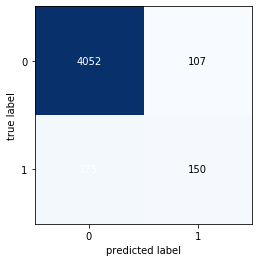

In [0]:
print("Rf")
import matplotlib.pyplot as plt
from mlxtend.evaluate import confusion_matrix
cm = confusion_matrix(y_target=test_y, 
                      y_predicted=pred, 
                      binary=True, 
                      positive_label=1)
from mlxtend.plotting import plot_confusion_matrix

fig, ax = plot_confusion_matrix(conf_mat=cm)
plt.show()




~ Using LDA ~ 


/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


Predicting tweet: Virat score a double centruy in test match
Result: ['SP']
Accuracy: 53.434%


/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


Train acc : 0.950182169678043
roc_auc_score : 0.7104049225175353
              precision    recall  f1-score   support

          ST       0.33      0.32      0.32       149
          PT       0.36      0.41      0.38       325
          HT       0.37      0.49      0.42       216
          BN       0.23      0.42      0.30       147
          ED       0.55      0.48      0.51       176
          SP       0.77      0.74      0.76      1328
          EN       0.55      0.65      0.59       345
          SI       0.25      0.16      0.19       332
          RE       0.58      0.63      0.60       316
          GM       0.56      0.41      0.47       524
          WB       0.45      0.46      0.45       626

    accuracy                           0.53      4484
   macro avg       0.46      0.47      0.46      4484
weighted avg       0.54      0.53      0.53      4484



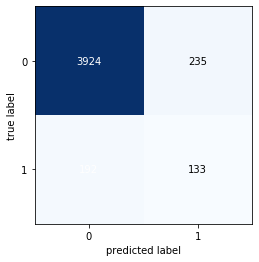

In [0]:
#LDA
print()
print ("~ Using LDA ~ ")
LDAModel = LinearDiscriminantAnalysis()
accuracyLDA = train_model(LDAModel,xtrain_count.toarray(), train_y, xtest_count.toarray(), test_y, verbose=True)
print ("Accuracy: {}%".format(formatAccuracy(accuracyLDA)))
LDAModel = LDAModel.fit(xtrain_count.toarray(), train_y) 
pred = LDAModel.predict(xtest_count)
from sklearn.metrics import roc_curve
def multiclass_roc_auc_score(y_test, y_pred, average="macro"):
    lb = sklearn.preprocessing.LabelBinarizer()
    lb.fit(y_test)
    y_test = lb.transform(y_test)
    y_pred = lb.transform(y_pred)
    return roc_auc_score(y_test, y_pred, average=average)

train_acc= accuracy_score(train_y, LDAModel.predict(xtrain_count.toarray()))
print("Train acc :",train_acc)
print("roc_auc_score :",multiclass_roc_auc_score(test_y,pred))
print(classification_report(test_y, pred,target_names=my_tags))
import matplotlib.pyplot as plt
from mlxtend.evaluate import confusion_matrix
cm = confusion_matrix(y_target=test_y, 
                      y_predicted=pred, 
                      binary=True, 
                      positive_label=1)
from mlxtend.plotting import plot_confusion_matrix

fig, ax = plot_confusion_matrix(conf_mat=cm)
plt.show()




~ Using NN ~ 
Predicting tweet: Virat score a double centruy in test match
Result: ['SP']
Accuracy: 69.96%
Train acc : 0.9594765410067663
roc_auc_score : 0.8046508292223745
              precision    recall  f1-score   support

          ST       0.57      0.50      0.53       149
          PT       0.53      0.54      0.53       325
          HT       0.65      0.66      0.66       216
          BN       0.50      0.49      0.50       147
          ED       0.82      0.76      0.79       176
          SP       0.83      0.87      0.85      1328
          EN       0.76      0.76      0.76       345
          SI       0.37      0.33      0.35       332
          RE       0.86      0.83      0.84       316
          GM       0.74      0.72      0.73       524
          WB       0.57      0.59      0.58       626

    accuracy                           0.70      4484
   macro avg       0.66      0.64      0.65      4484
weighted avg       0.70      0.70      0.70      4484



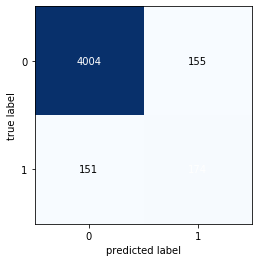

In [0]:
#NN
print()
print ("~ Using NN ~ ")
NNModel = MLPClassifier(activation='relu', max_iter=800, solver='lbfgs', learning_rate_init=0.005, hidden_layer_sizes=(46, 44), random_state=1)
accuracyNN = train_model(NNModel, xtrain_count.toarray(), train_y, xtest_count.toarray(), test_y, verbose=True)
print ("Accuracy: {}%".format(formatAccuracy(accuracyNN)))
NNModel = NNModel.fit(xtrain_count, train_y) 
pred = NNModel.predict(xtest_count)
from sklearn.metrics import roc_curve
def multiclass_roc_auc_score(y_test, y_pred, average="macro"):
    lb = sklearn.preprocessing.LabelBinarizer()
    lb.fit(y_test)
    y_test = lb.transform(y_test)
    y_pred = lb.transform(y_pred)
    return roc_auc_score(y_test, y_pred, average=average)


train_acc= accuracy_score(train_y, NNModel.predict(xtrain_count))
print("Train acc :",train_acc)

print("roc_auc_score :",multiclass_roc_auc_score(test_y,pred))
print(classification_report(test_y, pred,target_names=my_tags))
cm = confusion_matrix(y_target=test_y, 
                      y_predicted=pred, 
                      binary=True, 
                      positive_label=1)
fig, ax = plot_confusion_matrix(conf_mat=cm)
plt.show()


In [0]:
def majority_voting(x_train, y_train, x_test, y_test):    
    NBPredict = NBModel.predict(x_test)
    SVCPredict = SVCModel.predict(x_test)
    LRPredict = LRModel.predict(x_test)
    RFPredict = RFModel.predict(x_test)
    NNPredict = NNModel.predict(x_test)
#    
    votingPred = []
    
    for i in range(len(y_test)):
        for_pred = [NBPredict[i], LRPredict[i], SVCPredict[i], RFPredict[i], NNPredict[i]]
        highest = for_pred[0]
        count = 0
        for current_pred in for_pred: 
            new_count = 0
            for test_pred in for_pred:
                if current_pred == test_pred:
                    new_count = new_count + 1
            if new_count > count:
                highest = current_pred
                count = new_count
        votingPred.append(highest)
           
    return metrics.accuracy_score(votingPred, y_test)

In [0]:
def majorityVotingPredictor(inputX):
    NBPredict = NBModel.predict(count_vect.transform([inputX]))
    SVCPredict = SVCModel.predict(count_vect.transform([inputX]))
    LRPredict = LRModel.predict(count_vect.transform([inputX]))
    RFPredict = RFModel.predict(count_vect.transform([inputX]))
    NNPredict = NNModel.predict(count_vect.transform([inputX]))
    
    print("NB: {}".format(encoder.inverse_transform(NBPredict)))
    print("SVC: {}".format(encoder.inverse_transform(SVCPredict)))
    print("LR: {}".format(encoder.inverse_transform(LRPredict)))
    print("RF: {}".format(encoder.inverse_transform(RFPredict)))
    print("NN: {}".format(encoder.inverse_transform(NNPredict)))
    
    for_pred = [NBPredict, LRPredict, SVCPredict, RFPredict, NNPredict]
    highest = for_pred[0]
    count = 0
    for current_pred in for_pred: 
        new_count = 0
        for test_pred in for_pred:
            if current_pred == test_pred:
                new_count = new_count + 1
        if new_count > count:
            highest = current_pred
            count = new_count
    
    return encoder.inverse_transform(highest)

In [0]:
print()
print ("~ Using Majority Voting ~ ")
votingAccuracy = majority_voting(xtrain_count, train_y, xtest_count, test_y)
print ("Accuracy: {}%".format(formatAccuracy(votingAccuracy)))


~ Using Majority Voting ~ 
Accuracy: 73.885%


In [0]:
custom_input = "Virat score a double century"
print("Predicting tweet: {}".format(custom_input))
result = majorityVotingPredictor(preprocess(custom_input))
print("Majority Voting: {}".format(result))

Predicting tweet: Virat score a double century
NB: ['SP']
SVC: ['SP']
LR: ['SP']
RF: ['SP']
NN: ['SP']
Majority Voting: ['SP']
